# Python Final Project Code

In [158]:
#Import Libraries used for the analysis
import json
import numpy as np
import pandas as pd
import pymysql
import sys
import matplotlib

Imported Our CSV File

In [ ]:
#Import DATA file as CSV
data = pd.read_csv('C:/Users/Monil Shah/Google Drive/Temple University MSBA/Courses/BU STAT 5606 401/Final Project/Data sets/Crime_Data.csv')
data.head()

# DATA Cleaning, Preparation Code

Data Cleaning Code:

When a CSV file is parsed using Pandas, by default empty cells are parsed as 'NaN' String.
We write a Clean Function to clean the Data.


In [ ]:
# Writing Code to replace NaN with 0
    
temp_data = data['Weapon Description']
for rows in temp_data:
    if (rows=='Nan'):
        rows.replace('Nan',0)
        
temp_data = data['Status Description']
for rows in temp_data:
    if (rows=='Nan'):
        rows.replace('Nan',0)
        
temp_data = data['Status Description']
for rows in temp_data:
    if (rows=='Nan'):
        rows.replace('Nan',0)

temp_data = data['Location ']
for rows in temp_data:
    if (rows=='Nan'):
        rows.replace('Nan',0)
        
temp_data = data['Premise Code']
for rows in temp_data:
    if (rows=='Nan'):
        rows.replace('Nan',0)


Data Preparation Code

Normalization requires us to decompose the data in tables. After Decomposing we need 3 new primary keys for Location, Date_Time and Victim Tables, as there are no unique keys available

In [ ]:
# Creating Primary Keys for all the tables post Normalization of the Data

# Date_Time_ID
data = data.assign(Date_Time_ID=pd.Series(np.random.randint(len(data),size=len(data)), index=data.index))
# data['Date_Time_ID']

# Location ID
data = data.assign(Location_ID =pd.Series(np.random.randint(len(data),size=len(data)), index=data.index))

# Victim ID
data = data.assign(Victim_ID =pd.Series(np.random.randint(len(data),size=len(data)), index=data.index))

# Crime ID
data = data.assign(Crime_ID =pd.Series(np.random.randint(len(data),size=len(data)), index=data.index))


We need a list of Unique instances of all the Crime Code, Premise Code and Weapon Used Code

Form a "Generate Unique Code" Function to harness the codes

In [ ]:
# Generate Unique Code Function 
# Creating a set of all all codes and storing them in a dictionary to feed them in SQL

# Function Definition 
def Unique_Code_generator(Column):
    temp_data = data[Column]

    # Creating a code to store values in columns
    temp_set = {}
    temp_set = temp_data.unique()

    # Unique Crime Codes converted to Sets
    temp_list = list(temp_set)
    return temp_list

# Calling functions to generate unique code
Crime_Code_List = Unique_Code_generator('Crime Code')
Premise_Code_List = Unique_Code_generator('Premise Code')
Weapon_Used_Code_List = Unique_Code_generator('Weapon Used Code')

print(len(Unique_Code_generator('Crime Code')))
print(len(Unique_Code_generator('Premise Code')))
print(len(Unique_Code_generator('Weapon Used Code')))

# We will use these lists to put in SQL Database

# SQL CODE

In [ ]:
connection = pymysql.connect(host = 'localhost',
                             user = 'root',
                             passwd = 'root',
                             charset='utf8mb4', use_unicode=True);

Table Creation Queries

In [ ]:
db_name = 'LA_CRIME_DATA'
create_db_query = "CREATE DATABASE IF NOT EXISTS `{0}` Default character set 'utf8mb4'".format(db_name)

# Create a database
cursor = connection.cursor()
cursor.execute(create_db_query)
cursor.close()

In [ ]:
cursor = connection.cursor()
db_name = 'LA_CRIME_DATA'
table_name = 'CRIME'
# Create a table
# The {0} and {1} are placeholders for the parameters in the format(....) statement
create_table_query = '''CREATE TABLE IF NOT EXISTS `{0}`.`{1}` 
                                (`DR Number` int, Date_Time int, Location int, Crime_ID int, Area_ID int,
                                PRIMARY KEY(`DR Number`)
                                )'''.format(db_name, table_name)
cursor.execute(create_table_query)
cursor.close()

In [ ]:
cursor = connection.cursor()
db_name = 'LA_CRIME_DATA'
table_name = 'CRIME_INFO'
# Create a table
# The {0} and {1} are placeholders for the parameters in the format(....) statement
create_table_query = '''CREATE TABLE IF NOT EXISTS `{0}`.`{1}` 
                                (Crime_ID int, Crime_code int, Victim_ID int, Weapon_ID int, Status_Code int,
                                PRIMARY KEY(`Crime_Id`))'''.format(db_name, table_name)
cursor.execute(create_table_query)
cursor.close()

In [ ]:
cursor = connection.cursor()
db_name = 'LA_CRIME_DATA'
table_name = 'CRIME_CODE'
# Create a table
# The {0} and {1} are placeholders for the parameters in the format(....) statement
create_table_query = '''CREATE TABLE IF NOT EXISTS `{0}`.`{1}` 
                                (`Crime_Code` int, Crime_description varchar(45),
                                PRIMARY KEY(`Crime_code`), FOREIGN KEY(Crime_code) references CRIME_INFO(`Crime_ID`)
                                )'''.format(db_name, table_name)
cursor.execute(create_table_query)
cursor.close()

In [ ]:
cursor = connection.cursor()
db_name = 'LA_CRIME_DATA'
table_name = 'VICTIM'
# Create a table
# The {0} and {1} are placeholders for the parameters in the format(....) statement
create_table_query = '''CREATE TABLE IF NOT EXISTS `{0}`.`{1}` 
                                (Victim_ID int, Victim_Gender VARCHAR(45), Victim_Age Int, Victim_Decent VARCHAR(45),
                                PRIMARY KEY (Victim_ID), FOREIGN KEY(Victim_ID) references CRIME_INFO(Victim_ID))'''.format(db_name, table_name)
cursor.execute(create_table_query)
cursor.close()

In [ ]:
cursor = connection.cursor()
db_name = 'LA_CRIME_DATA'
table_name = 'WEAPON CODE'
# Create a table
# The {0} and {1} are placeholders for the parameters in the format(....) statement
create_table_query = '''CREATE TABLE IF NOT EXISTS `{0}`.`{1}` 
                                (Weapon_Code int,Wepon_Description VARCHAR(45),
                                PRIMARY KEY(Weapon_Code), FOREIGN KEY(Weapon_Code) references CRIME_INFO(`Weapon_Code`)
                                )'''.format(db_name, table_name)
cursor.execute(create_table_query)
cursor.close()

In [ ]:
cursor = connection.cursor()
db_name = 'LA_CRIME_DATA'
table_name = 'STATUS CODE'
# Create a table
# The {0} and {1} are placeholders for the parameters in the format(....) statement
create_table_query = '''CREATE TABLE IF NOT EXISTS `{0}`.`{1}` 
                                (Status_Code int, Status_Description varchar(45),
                                PRIMARY KEY(`status_code`)), FOREIGN KEY(Weapon_ID) references CRIME_INFO(`Weapon_ID`)'''.format(db_name, table_name)
cursor.execute(create_table_query)
cursor.close()

In [ ]:
cursor = connection.cursor()
db_name = 'LA_CRIME_DATA'
table_name = 'LOCATION'
# Create a table
# The {0} and {1} are placeholders for the parameters in the format(....) statement
create_table_query = '''CREATE TABLE IF NOT EXISTS `{0}`.`{1}` 
                                (Location_ID int, Lattitude int, Longitude int,
                                PRIMARY KEY(`Location_ID`), FOREIGN KEY(Location_ID) references CRIME_MAIN(`Location_ID`)
                                )'''.format(db_name, table_name)
cursor.execute(create_table_query)
cursor.close()

In [ ]:
cursor = connection.cursor()
db_name = 'LA_CRIME_DATA'
table_name = 'Date_Time'
# Create a table
# The {0} and {1} are placeholders for the parameters in the format(....) statement
create_table_query = '''CREATE TABLE IF NOT EXISTS `{0}`.`{1}` 
                                (Date_Time_ID int, Date_ID int, Time_ID int,
                                PRIMARY KEY(`Date_Time_ID`), FOREIGN KEY(Date_Time_ID) references CRIME_MAIN(`Date_Time`)
                                )'''.format(db_name, table_name)
cursor.execute(create_table_query)
cursor.close()

In [ ]:
cursor = connection.cursor()
db_name = 'LA_CRIME_DATA'
table_name = 'AREA'
# Create a table
# The {0} and {1} are placeholders for the parameters in the format(....) statement
create_table_query = '''CREATE TABLE IF NOT EXISTS `{0}`.`{1}` 
                                (Area_ID int,Area varchar(25),
                                PRIMARY KEY(`Area_ID`), FOREIGN KEY(Area_ID) references CRIME_MAIN(`Area_ID`)
                                )'''.format(db_name, table_name)
cursor.execute(create_table_query)
cursor.close()

Data Insertion Queries 

In [ ]:
#CRIME Table
cursor = connection.cursor()

# Using a For Loop to Iterate through Data Frame


for index, row in data.iterrows():
    insert_data_query ='INSERT into LA_CRIME_DATA.CRIME_MAIN VALUES (%d,%d,%d,%d,%d)'.format(row['Crime_ID'],(row['Crime_Code']+row['Victim_ID']),row['Weapon_Code'],row['Status_Code'])
    cursor.execute(insert_data_query)

connection.commit()
cursor.close()

In [ ]:
# CRIME INFO Table
# Replace CRIME_MAIN with other Table Name
# Adjust the Query 

cursor = connection.cursor()

# Using a For Loop to Iterate through Data Frame

for index, row in data.iterrows():
    insert_data_query ='INSERT into LA_CRIME_DATA.CRIME_MAIN VALUES (%d,%d,%d,%d,%d)'.format(row['Crime_ID'],(row['Crime_Code']+row['Victim_ID']),row['Weapon_Code'],row['Status_Code'])
    cursor.execute(insert_data_query)

connection.commit()
cursor.close()

In [ ]:
# CRIME CODE Table
# Replace CRIME_MAIN with other Table Name
# Adjust the Query 

cursor = connection.cursor()

# Using a For Loop to Iterate through Data Frame

for index, row in data.iterrows():
    insert_data_query ='INSERT into LA_CRIME_DATA.CRIME_MAIN VALUES (%d,%s)'.format(row['Crime_Code'],(row['Crime_Description']))cursor.execute(insert_data_query)

connection.commit()
cursor.close()

In [ ]:
#VICTIM TABLE
# Replace CRIME_MAIN with other Table Name
# Adjust the Query 

cursor = connection.cursor()

# Using a For Loop to Iterate through Data Frame

for index, row in data.iterrows():
    insert_data_query ='INSERT into LA_CRIME_DATA.CRIME_MAIN VALUES (%d,%s,%d,%s)'.format(row['Victim_ID'],(row['Victim_Gender']+row['Victim_Age']),row['VictimDecent'])
    cursor.execute(insert_data_query)

connection.commit()
cursor.close()

In [ ]:
# WEAPON CODE
# Replace CRIME_MAIN with other Table Name
# Adjust the Query 

cursor = connection.cursor()

# Using a For Loop to Iterate through Data Frame

for index, row in data.iterrows():
    insert_data_query ='INSERT into LA_CRIME_DATA.CRIME_MAIN VALUES (%d,%s)'.format(row['Weapon_Code'],(row['Weapon_Description'])
    cursor.execute(insert_data_query)

connection.commit()
cursor.close()

In [ ]:
# STATUS CODE
# Replace CRIME_MAIN with other Table Name
# Adjust the Query 

cursor = connection.cursor()

# Using a For Loop to Iterate through Data Frame

for index, row in data.iterrows():
    insert_data_query ='INSERT into LA_CRIME_DATA.CRIME_MAIN VALUES (%d,%s)'.format(row['Status_Code'],row['Status_Description'])
    cursor.execute(insert_data_query)

connection.commit()
cursor.close()

In [ ]:
# LOCATION TABLE
# Replace CRIME_MAIN with other Table Name
# Adjust the Query 

cursor = connection.cursor()

# Using a For Loop to Iterate through Data Frame
for index, row in data.iterrows():
    insert_data_query ='INSERT into LA_CRIME_DATA.CRIME_MAIN VALUES (%d,%d,%d)'.format(row['Location_ID'],(row['Latitudes']+row['Longitudes'])
    cursor.execute(insert_data_query)

connection.commit()
cursor.close()

In [ ]:
# AREA TABLE
# Replace CRIME_MAIN with other Table Name
# Adjust the Query 

cursor = connection.cursor()

# Using a For Loop to Iterate through Data Frame

for index, row in data.iterrows():
    insert_data_query ='INSERT into LA_CRIME_DATA.CRIME_MAIN VALUES (%d,%s,)'.format(row['Area_ID'],(row['Area_Name'])
    cursor.execute(insert_data_query)

connection.commit()
cursor.close()

In [ ]:
# DATE TIME TABLE
# Replace CRIME_MAIN with other Table Name
# Adjust the Query 

cursor = connection.cursor()

# Using a For Loop to Iterate through Data Frame

for index, row in data.iterrows():
    insert_data_query ='INSERT into LA_CRIME_DATA.CRIME_MAIN VALUES (%d,%s,%s,%d)'.format(row['Date_Time_ID'],(row['Date_Occured']+row['Date_Reported']))
    cursor.execute(insert_data_query)

connection.commit()
cursor.close()

# DATA ANALYSIS SECTION



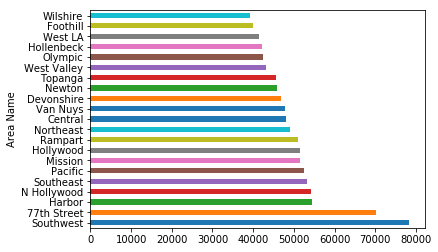

In [159]:
#Top 10 Most Crime Infested Areas in LA
data["Area Name"].groupby(data["Area Name"]).count().sort_values(ascending=False).plot(kind="barh")

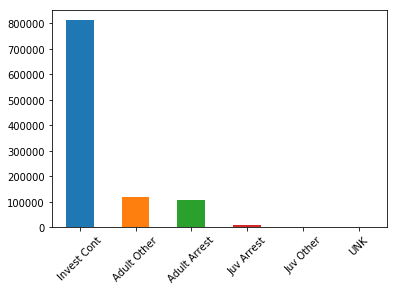

In [160]:
#Status of Crime Reported.
data["Status Description"].value_counts().plot(kind="bar",rot=45)

In [161]:
#Trend in the SouthWest Area
Southwest = data.set_index(['Area Name']).loc['Southwest']
Southwest.head(5)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,...,Crime Code 4,Address,Cross Street,Location,Latitude,Longitude,Date_Time_ID,Location_ID,Victim_ID,Crime_ID
Area Name,,,,,,,,,,,,,,,,,,,,,
Southwest,130322987,10/27/2013,10/26/2013,1800,3,396,510,VEHICLE - STOLEN,NaN,12.0,...,NaN,42ND,MENLO,"(34.0074, -118.29)",34.0074,-118.2900,409670,214359,25201,1039167
Southwest,130325133,12/1/2013,11/30/2013,1800,3,394,510,VEHICLE - STOLEN,NaN,12.0,...,NaN,VERNON,3RD,"(34.0037, -118.3203)",34.0037,-118.3203,452293,344808,256129,805615
Southwest,130323518,11/4/2013,11/1/2013,1700,3,301,510,VEHICLE - STOLEN,NaN,12.0,...,NaN,CLYDE,ADAMS,"(34.0325, -118.3669)",34.0325,-118.3669,505947,458802,900435,169777
Southwest,130323846,11/8/2013,10/28/2013,1000,3,395,763,STALKING,0347 0913,50.0,...,NaN,VERNON,DENKER,"(34.0037, -118.3045)",34.0037,-118.3045,780347,101249,948858,542206
Southwest,130326498,12/25/2013,12/24/2013,2100,3,395,510,VEHICLE - STOLEN,NaN,12.0,...,NaN,43RD,GRAMERCY,"(34.0055, -118.3138)",34.0055,-118.3138,811239,632591,854820,530627


In [162]:
#Total Crimes in Southwest region from 2010-2017
Southwest.groupby('Area ID').size()

Area ID
3    78382
dtype: int64

In [163]:
# Count of types of Crimes in South West between 2010 - 2017
Southwest["Date Reported"] = pd.to_datetime(Southwest["Date Reported"])
pd.set_option('display.max_rows', 1000)
Southwest.groupby('Crime Code Description').size().head(25).sort_values(ascending=False)

Crime Code Description
BATTERY - SIMPLE ASSAULT                                        9195
BURGLARY                                                        5626
BURGLARY FROM VEHICLE                                           4664
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                  4016
BURGLARY, ATTEMPTED                                              617
ATTEMPTED ROBBERY                                                575
BATTERY WITH SEXUAL CONTACT                                      432
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT                          417
BRANDISH WEAPON                                                  328
BIKE - STOLEN                                                    323
BATTERY POLICE (SIMPLE)                                          197
ARSON                                                            132
BURGLARY FROM VEHICLE, ATTEMPTED                                 120
BUNCO, GRAND THEFT                                                92
CHILD ABUSE

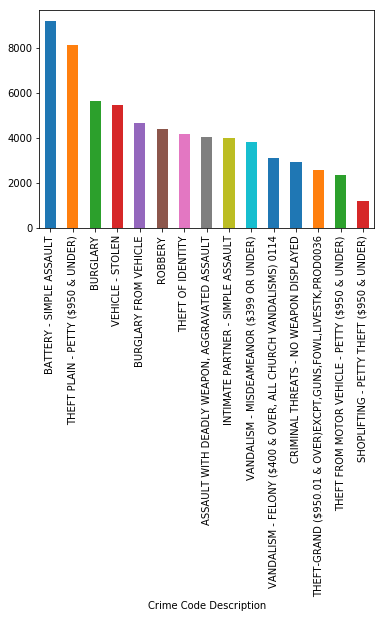

In [164]:
# top 15 Crimes in South West
Southwest.groupby('Crime Code Description').size().sort_values(ascending=False).head(15).plot(kind="bar")

[Text(0,0.5,'# arrests'), Text(0.5,0,'date')]

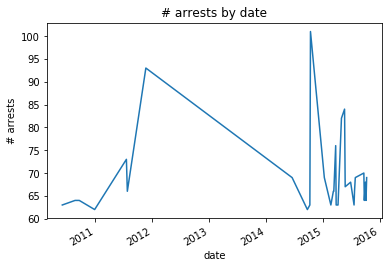

In [165]:
#Traffic, DR, Robbery and Theft are the top happening Crimes near USC/Downtown
Southwest.groupby('Date Reported').size().sort_values(ascending=False).head(30).plot(title="# arrests by date").set(xlabel = "date",ylabel = "# arrests")